In [26]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

pp File: ../InputData/pT_Rebin_1_16dPhi/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/pT_Rebin_1_16dPhi/pPb_SE_L0_Correlation_GMB_Ratio.root


In [27]:
print(ZYAM_Max_i-ZYAM_Min_i)
print(ZYAM_Max_i)
print(ZYAM_Min_i)
print delta_phi_centers[ZYAM_Min_i:ZYAM_Max_i]
print N_Phi_Integrate
print delta_phi_centers[-N_Phi_Integrate:]
#print dPhi_Width

7
9
2
[0.4908738521234052, 0.6872233929727672, 0.8835729338221293, 1.0799224746714913, 1.2762720155208536, 1.4726215563702154, 1.6689710972195777]
6
[2.061670178918302, 2.2580197197676637, 2.454369260617026, 2.6507188014663883, 2.84706834231575, 3.043417883165112]


**root to numpy**

In [28]:
Corrs = ROOT_to_nparray()
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [29]:
Correlated_Subtraction_Weights(Corrs)
print_from_Dict(Corrs)
#Plot_UB_Subtraction(Corrs)

p-Pb_CSR:
0.2541, 0.2531, 0.2462, 0.2548, 0.2568, 0.2737, 0.2720, 0.2740, 0.2771, 0.3095, 0.2934, 0.3103, 0.3169, 0.3110, 0.3295, 0.3671, 
0.1340, 0.1635, 0.1835, 0.1594, 0.1558, 0.1759, 0.1833, 0.1716, 0.1972, 0.1779, 0.2016, 0.2076, 0.2368, 0.2140, 0.2387, 0.2359, 
0.0643, 0.0819, 0.0819, 0.0818, 0.0966, 0.0784, 0.0700, 0.0793, 0.1000, 0.0915, 0.1002, 0.1056, 0.0883, 0.1076, 0.1169, 0.1290, 
0.0177, 0.0258, 0.0242, 0.0186, 0.0309, 0.0277, 0.0304, 0.0240, 0.0436, 0.0335, 0.0374, 0.0317, 0.0337, 0.0426, 0.0461, 0.0614, 
0.0044, 0.0012, 0.0103, 0.0115, 0.0083, 0.0088, 0.0084, 0.0081, 0.0063, 0.0089, 0.0060, 0.0115, 0.0170, 0.0216, 0.0241, 0.0190, 
0.0023, 0.0020, 0.0007, 0.0013, 0.0015, 0.0016, -0.0003, 0.0017, 0.0018, 0.0012, 0.0014, 0.0029, 0.0039, 0.0076, 0.0056, 0.0052, 
0.0002, 0.0006, -0.0001, 0.0003, 0.0006, 0.0009, 0.0002, 0.0000, 0.0001, 0.0004, 0.0006, 0.0007, 0.0004, 0.0006, 0.0022, 0.0002, 

pp_CSR:
0.0478, 0.0957, 0.0796, 0.0831, 0.1103, 0.0988, 0.0854, 0.0868, 0.0957, 0.10

**Pedestal Subtraction**

<Figure size 1728x864 with 0 Axes>

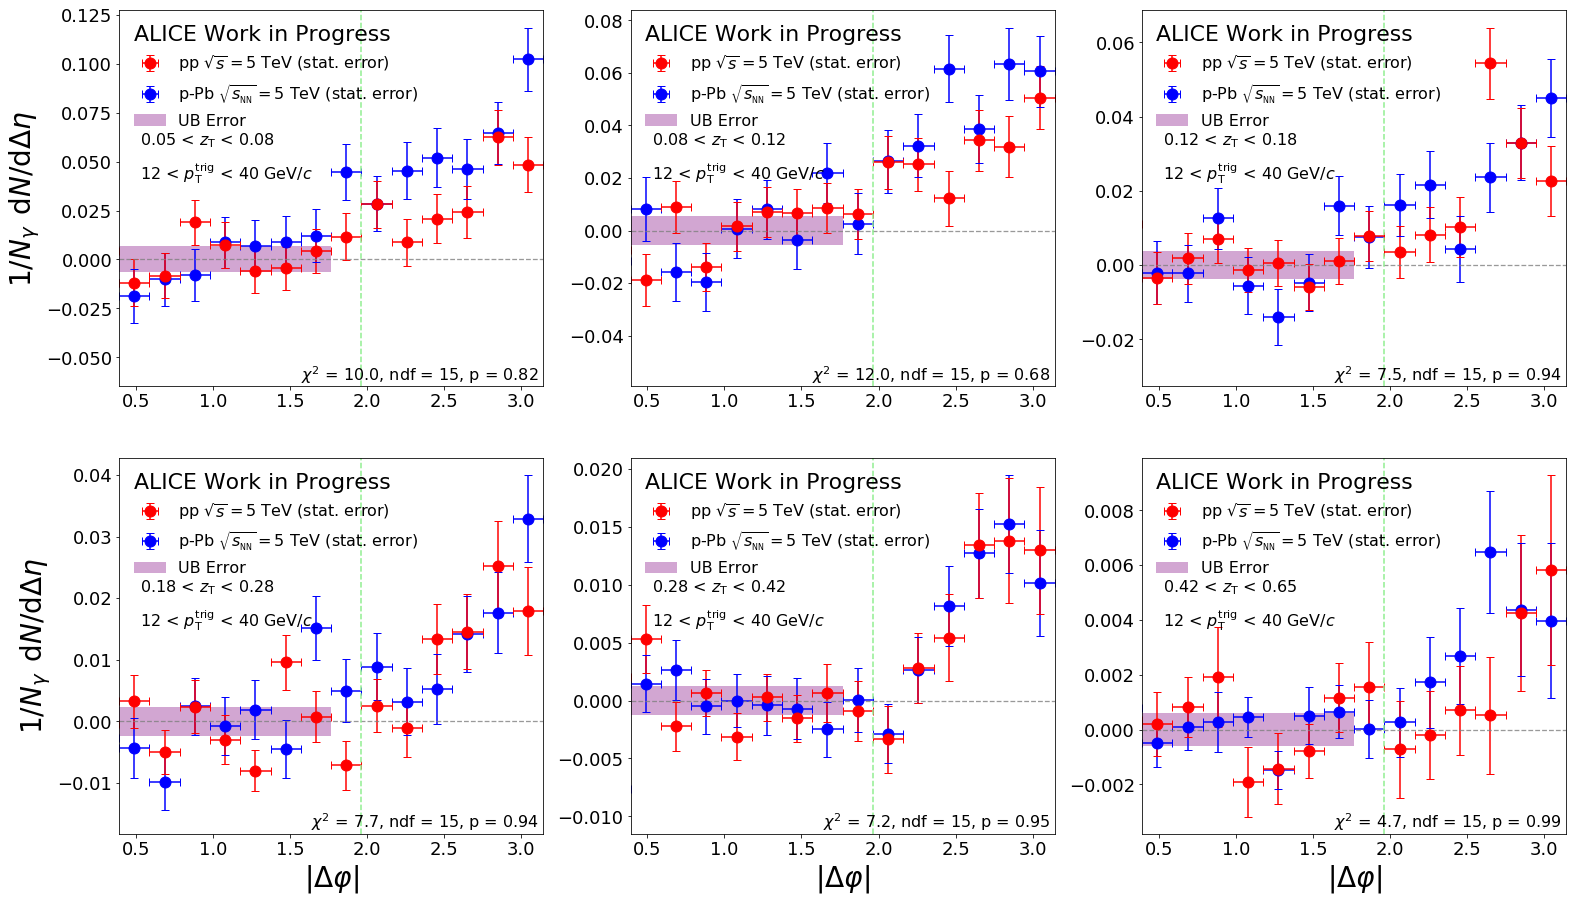

In [30]:
Ped_Sub_After_Cs(Corrs)
#print_from_Dict(Corrs)
Plot_pp_pPb_Cs(Corrs)
#Compare_Cs_pTBins()


**Debugging**

In [31]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][1])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][1][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][1][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][1][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)

Number of Away side bins = 6
[-0.01121876 -0.00753388 -0.01883747  0.00883756 -0.01380131  0.00162122
  0.00702487  0.00652714  0.00862799  0.00617699  0.02596799  0.02525717
  0.01225837  0.03434376  0.03196077  0.05053391]
pp
0.153062 +\- 0.022861 +\- 0.018367
0.191591791514
p-Pb
0.240499 +\- 0.026769 +\- 0.021788
0.143514334647


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [32]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)

In [33]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [34]:
Frags = Get_Fragmentation(Corrs)

0.143514334647
5.869990 +\- 0.842428 +\- 0.021788


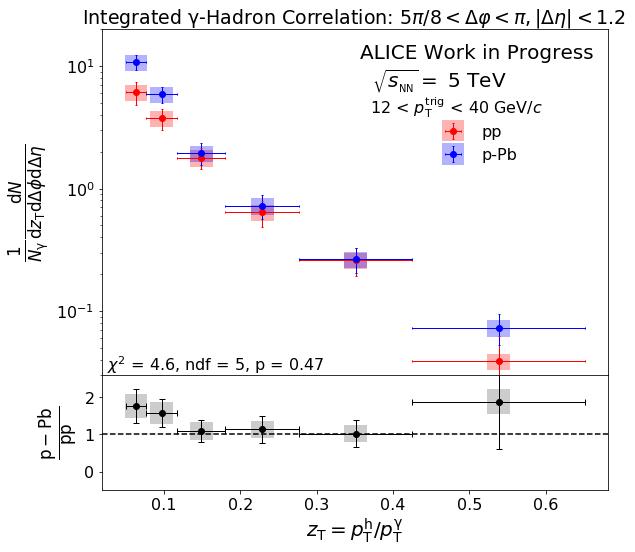

pp_Combined_FF_Errors:
1.3072, 0.7158, 0.3457, 0.1520, 0.0673, 0.0241, 0.0079, 

p-Pb_purity_Uncertainty:
1.5857, 0.8649, 0.2862, 0.1064, 0.0389, 0.0107, 0.0011, 

p-Pb_Combined_FF:
10.7617, 5.8700, 1.9421, 0.7224, 0.2642, 0.0730, 0.0075, 

pp_Combined_FF:
6.1230, 3.7359, 1.7802, 0.6380, 0.2587, 0.0388, 0.0188, 

pp_purity_Uncertainty:
0.9022, 0.5505, 0.2623, 0.0940, 0.0381, 0.0057, 0.0028, 

p-Pb_Combined_FF_Errors:
1.5226, 0.8424, 0.3957, 0.1623, 0.0606, 0.0207, 0.0059, 



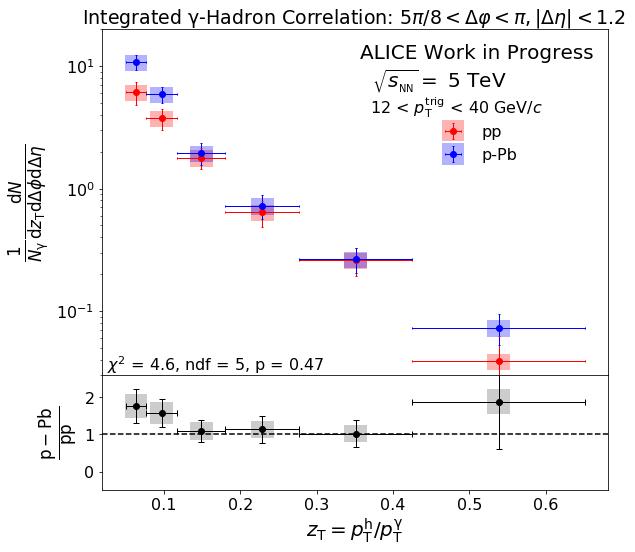

In [35]:

Combined_Frags = Average_FF(Frags)
print(Combined_Frags["p-Pb_Combined_FF_Errors"][1]/Combined_Frags["p-Pb_Combined_FF"][1])
print("%f +\- %f +\- %f"%(Combined_Frags["p-Pb_Combined_FF"][1],Combined_Frags["p-Pb_Combined_FF_Errors"][1],UE_Error))
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
#print_from_Dict(Frags)

Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
print_from_Dict(Frags_Avg_Cs)
Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [36]:
0.259/0.02048549

12.643095185909639

In [37]:
#Fit_FF_PowerLaw(Combined_Frags)

In [38]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [39]:
math.sqrt(0.26976493**2 + 0.10844206**2)

0.29074524559302517

[ 0.6539525   0.52327701  0.41106918  0.33634951  0.32600337  0.3852525
  0.48944342  0.61618529  0.75419352  0.89829031  1.04596233  1.19588586
  1.34730949  1.49977892  1.6530048   1.80679467  1.96101586  2.11557403
  2.27040038  0.6539525 ]
1.49346024183


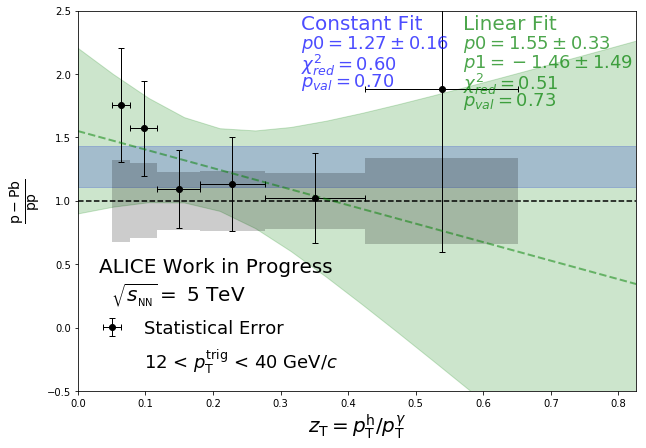

                Central Values:
[ 1.75759487  1.57125313  1.09094861  1.13219602  1.02101414  1.88117681]

                Satistical Uncertainty Values:
[ 0.4501451   0.37612984  0.30709227  0.37080486  0.35416633  1.28678951]

                Ratio Uncertainty from Purity:
[ 0.29795702  0.27442872  0.21806022  0.22257833  0.2105792   0.31391308]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.12428073  0.11110437  0.07714172  0.08005835  0.0721966   0.13301929]

                Full Systematic Uncertainty:
[ 0.32283755  0.29606638  0.23130306  0.23653848  0.22261166  0.34093336]
[ 0.6539525   0.52327701  0.41106918  0.33634951  0.32600337  0.3852525
  0.48944342  0.61618529  0.75419352  0.89829031  1.04596233  1.19588586
  1.34730949  1.49977892  1.6530048   1.80679467  1.96101586  2.11557403
  2.27040038  0.6539525 ]
1.49346024183


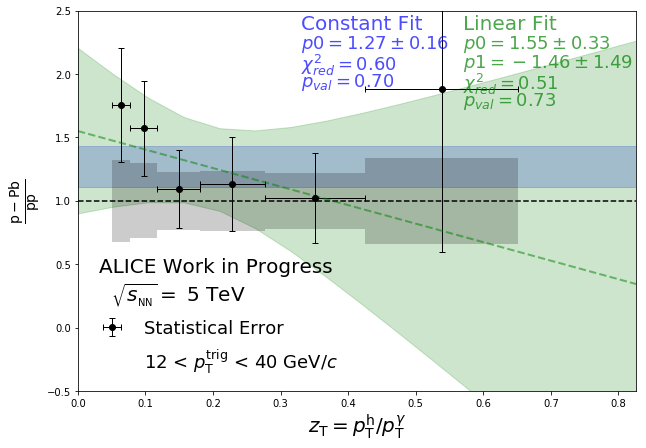

                Central Values:
[ 1.75759487  1.57125313  1.09094861  1.13219602  1.02101414  1.88117681]

                Satistical Uncertainty Values:
[ 0.4501451   0.37612984  0.30709227  0.37080486  0.35416633  1.28678951]

                Ratio Uncertainty from Purity:
[ 0.29795702  0.27442872  0.21806022  0.22257833  0.2105792   0.31391308]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.12428073  0.11110437  0.07714172  0.08005835  0.0721966   0.13301929]

                Full Systematic Uncertainty:
[ 0.32283755  0.29606638  0.23130306  0.23653848  0.22261166  0.34093336]

****************************************
Minimizer is Linear
Chi2                      =      3.01268
NDf                       =            5
p0                        =      1.27049   +/-   0.161256    

****************************************
Minimizer is Linear
Chi2                      =      2.05738
NDf                       =            4
p0                        =      1.55013 

In [40]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

###### Compare Different Binning

pT_Rebin_1_pDevNONE
pT_Rebin_2_pDevNONE
pT_Rebin_1_pDevNONE
pT_Rebin_2_pDevNONE
pT_Rebin_1_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
pT_Rebin_2_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_pDevNONE.npy


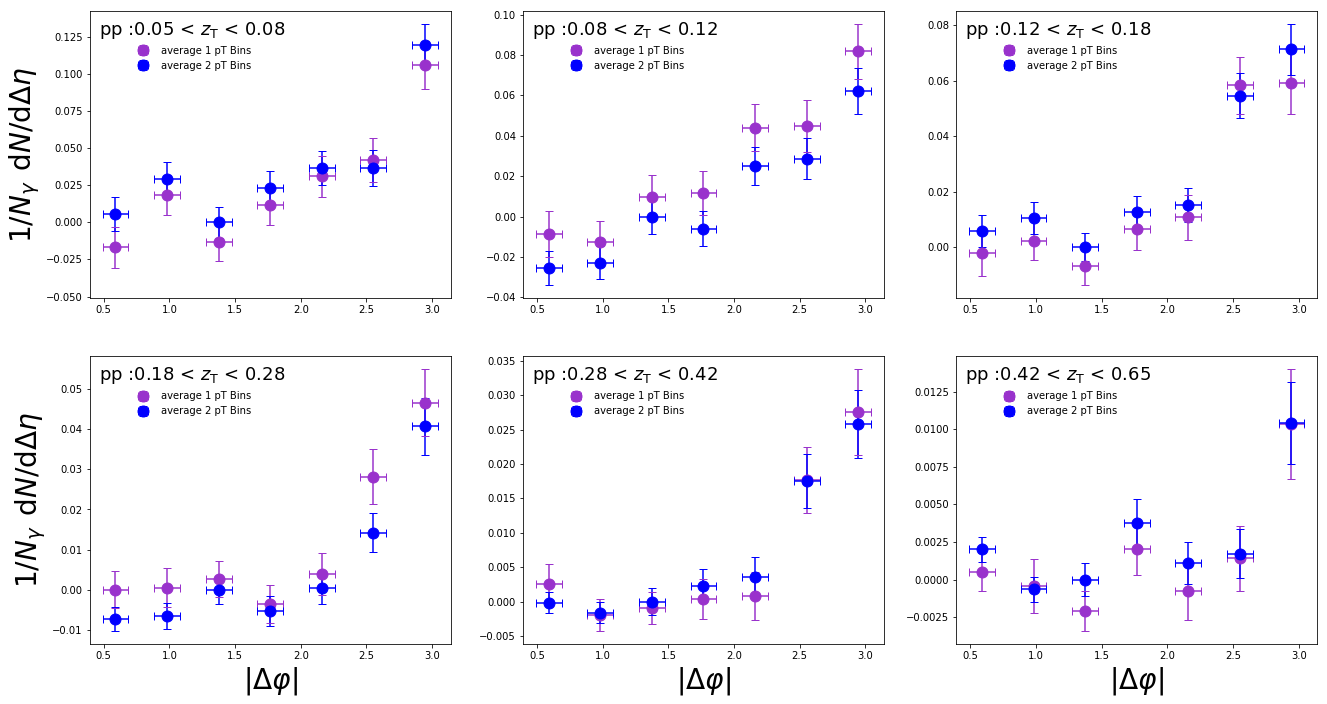

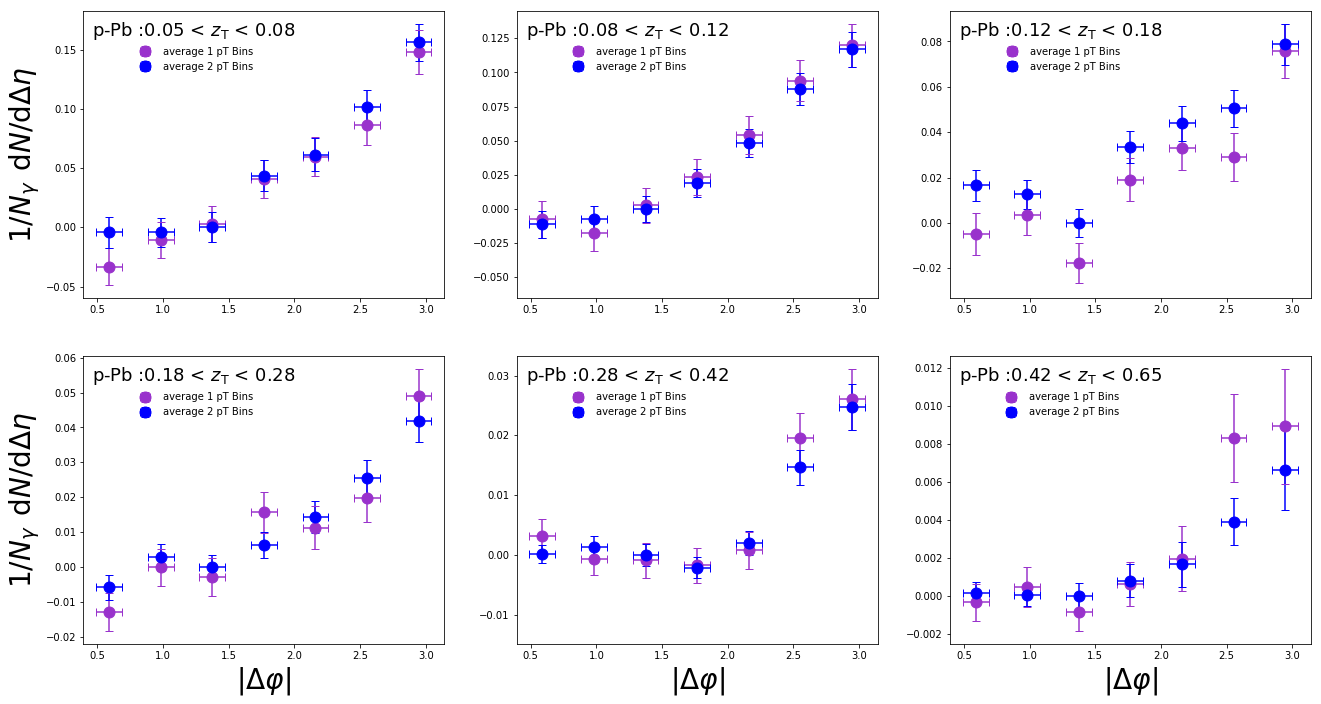

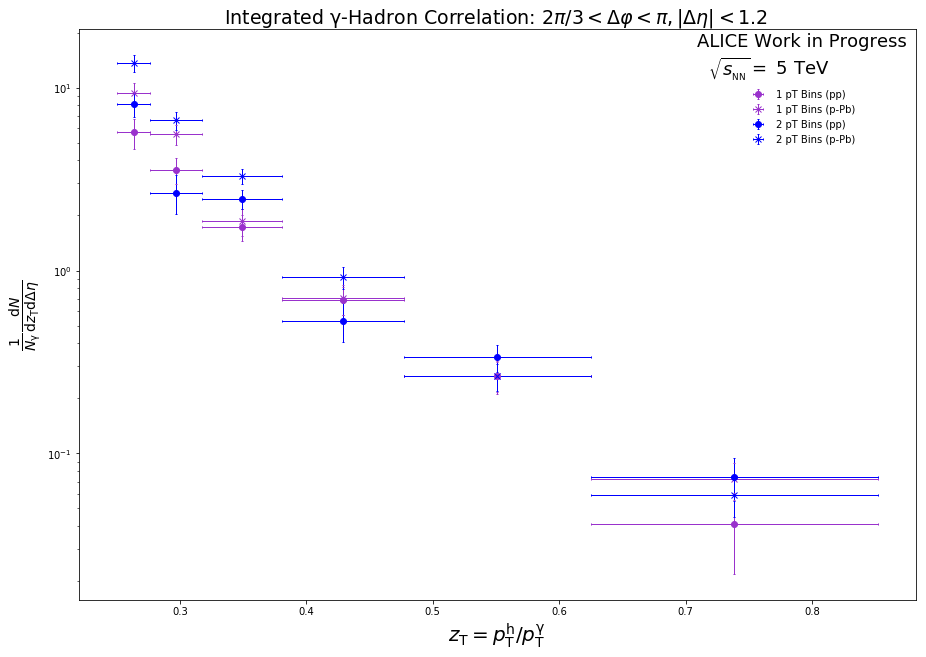

                Central Values:


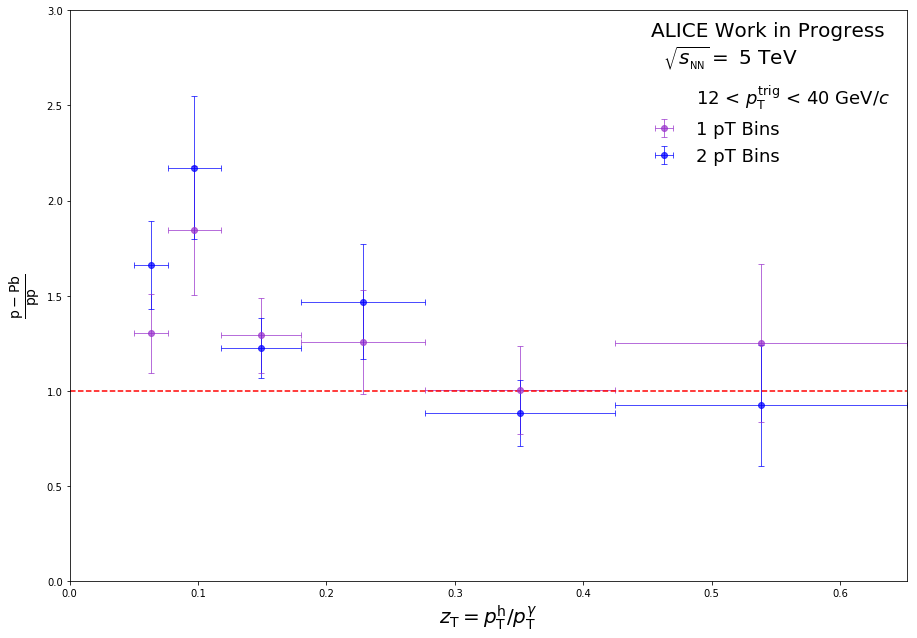

                Central Values:
[ 2.1735289   1.2269524   1.46956021  0.88350821  0.92337361  2.65976587]

****************************************
Minimizer is Linear
Chi2                      =      4.27221
NDf                       =            5
p0                        =      1.26834   +/-   0.116111    

****************************************
Minimizer is Linear
Chi2                      =      11.5664
NDf                       =            5
p0                        =      1.17613   +/-   0.0989879   


In [41]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE","pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights"]
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

[ 0.6539525   0.52327701  0.41106918  0.33634951  0.32600337  0.3852525
  0.48944342  0.61618529  0.75419352  0.89829031  1.04596233  1.19588586
  1.34730949  1.49977892  1.6530048   1.80679467  1.96101586  2.11557403
  2.27040038  0.6539525 ]
1.49346024183


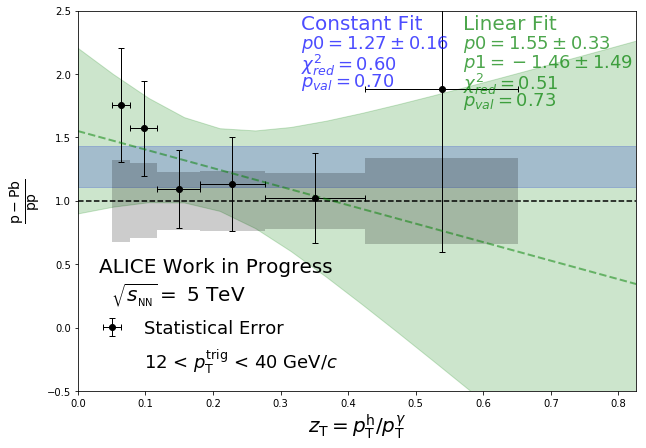

                Central Values:
[ 1.75759487  1.57125313  1.09094861  1.13219602  1.02101414  1.88117681]

                Satistical Uncertainty Values:
[ 0.4501451   0.37612984  0.30709227  0.37080486  0.35416633  1.28678951]

                Ratio Uncertainty from Purity:
[ 0.29795702  0.27442872  0.21806022  0.22257833  0.2105792   0.31391308]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.12428073  0.11110437  0.07714172  0.08005835  0.0721966   0.13301929]

                Full Systematic Uncertainty:
[ 0.32283755  0.29606638  0.23130306  0.23653848  0.22261166  0.34093336]

****************************************
Minimizer is Linear
Chi2                      =      3.01268
NDf                       =            5
p0                        =      1.27049   +/-   0.161256    

****************************************
Minimizer is Linear
Chi2                      =      2.05738
NDf                       =            4
p0                        =      1.55013 

In [17]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [18]:
reload(functions_fragmentation)
from functions_fragmentation import *

pT_Rebin_1_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
pT_Rebin_1_pDevPlus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
pT_Rebin_1_pDevMinus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
pT_Rebin_1_90p
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy


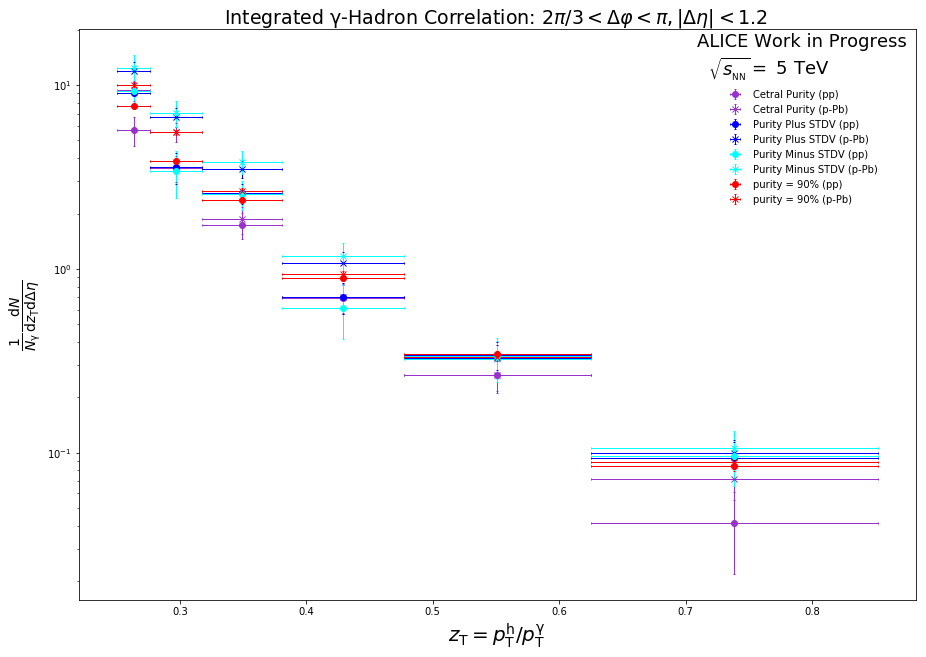

                Central Values:


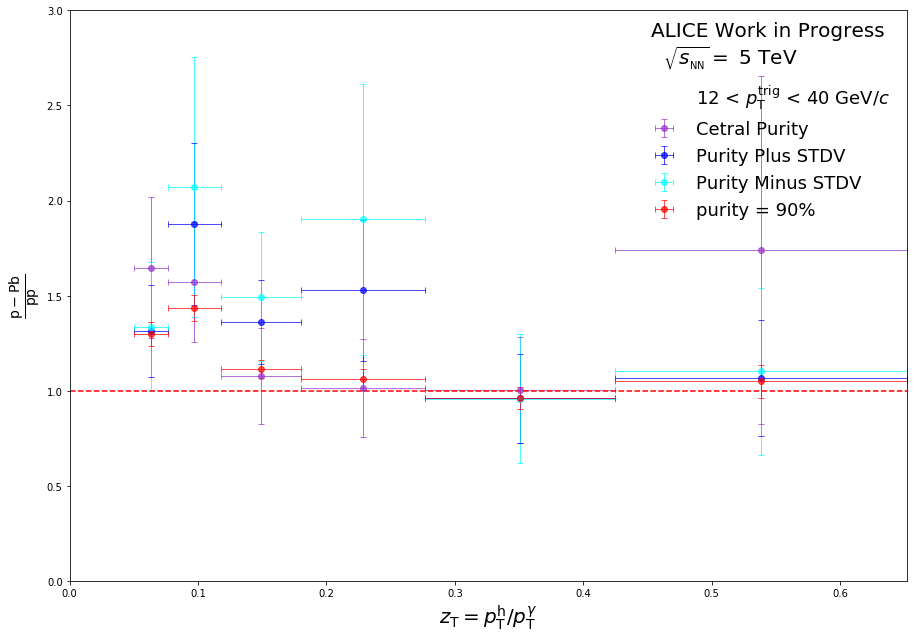

                Central Values:
[ 1.43467071  1.11537355  1.0607137   0.96336133  1.04910989  1.10430099]

****************************************
Minimizer is Linear
Chi2                      =      6.53289
NDf                       =            5
p0                        =      1.04846   +/-   0.124383    

****************************************
Minimizer is Linear
Chi2                      =       4.9914
NDf                       =            5
p0                        =      1.25966   +/-   0.126454    

****************************************
Minimizer is Linear
Chi2                      =      3.55471
NDf                       =            5
p0                        =      1.32233   +/-   0.193298    

****************************************
Minimizer is Linear
Chi2                      =      29.2107
NDf                       =            5
p0                        =      1.11008   +/-   0.0263325   


In [19]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)